In [1]:
from microsim import schema as ms
from microsim.schema.optical_config import lib
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(52, 512, 512), scale=(0.064, 0.064, 0.064)),
    output_space={"downscale": 2},
    sample=ms.Sample(
        labels=[
            ms.FluorophoreDistribution(
                distribution=ms.CosemLabel(dataset="jrc_hela-3", label="ne_pred"),
                fluorophore="mTagBFP2",
            ),
            ms.FluorophoreDistribution(
                distribution=ms.CosemLabel(dataset="jrc_hela-3", label="er-mem_pred"),
                fluorophore="EGFP",
            ),
            ms.FluorophoreDistribution(
                distribution=ms.CosemLabel(dataset="jrc_hela-3", label="mito-mem_pred"),
                fluorophore="mScarlet",
            ),
        ]
    ),
    channels=[lib.DAPI, lib.FITC, lib.DSRED],
    modality=ms.Confocal(pinhole_au=2),
    detector=ms.CameraCCD(qe=0.82, read_noise=6),
    output_path="h2-cf.tif",
    settings=ms.Settings(max_psf_radius_aus=2),
)

I0000 00:00:1718584206.977614 9073939 s3_resource.cc:108] Using default AdmissionQueue with limit 32
I0000 00:00:1718584207.130256 9074183 file_credential_provider.cc:142] Using profile [default] in file [/Users/talley/.aws/credentials]


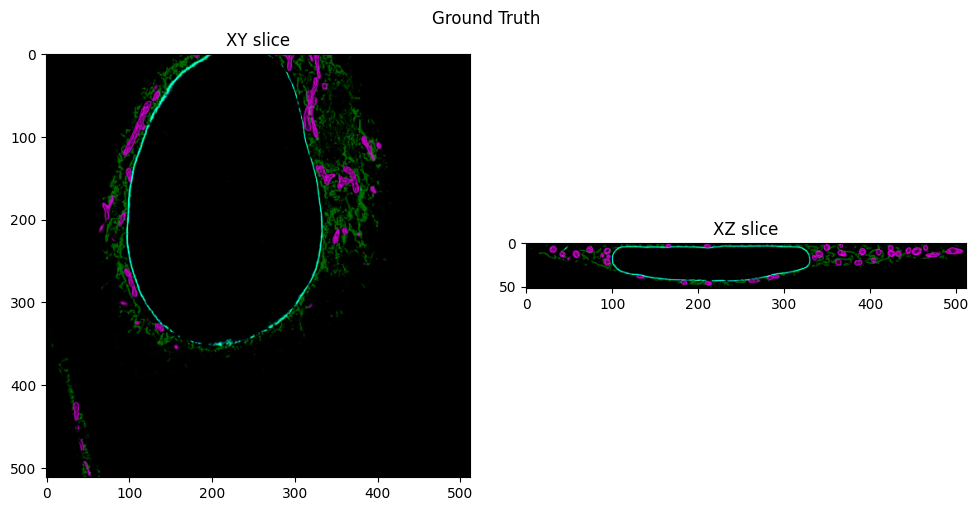

In [2]:
ground_truth = sim.ground_truth()
ortho_plot(ground_truth, title="Ground Truth", cmap=['cyan', 'green', 'magenta'])

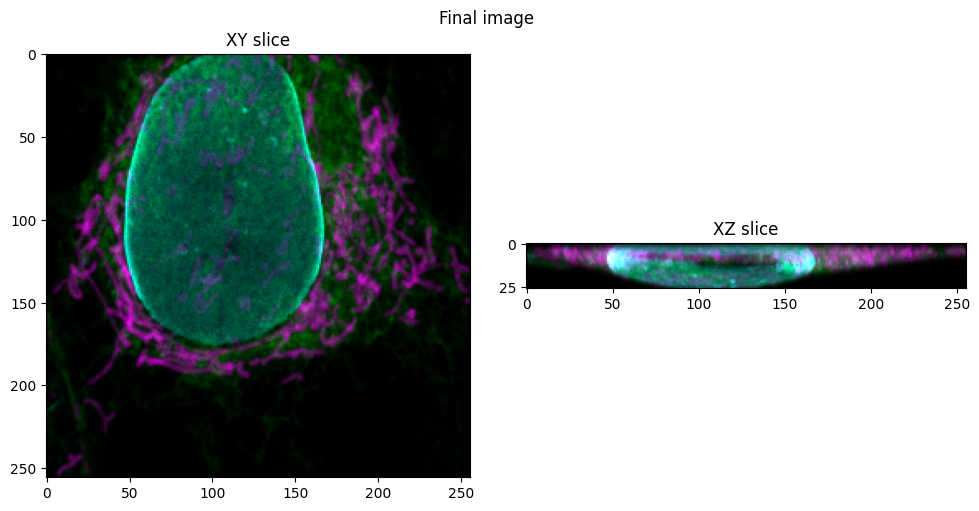

In [3]:
final = sim.run()
ortho_plot(final, title="Final image", cmap=['cyan', 'green', 'magenta'], mip=True)